# View Converted Cirq Circuits

Notebook for exploring circuits in `const_0_noiseless_lrb_cirq/`.

What this notebook does:
- lists available converted circuit files
- provides helper functions to load and inspect a selected circuit
- prints all operations and renders Cirq's SVG viewer for one file
- supports quick random spot-checks

## 1) Setup
Run this cell first to discover all `.cirq.pkl` files.

In [7]:
from pathlib import Path
import pickle
import random
from cirq.contrib.svg import SVGCircuit
from IPython.display import display

CIRQ_ROOT = Path("const_0_noiseless_lrb_cirq")
cirq_files = sorted(CIRQ_ROOT.rglob("*.cirq.pkl"))

print(f"CIRQ_ROOT: {CIRQ_ROOT.resolve()}")
print(f"Found {len(cirq_files)} circuit files")
print("First few files:")
for path in cirq_files[:10]:
    print(" -", path.relative_to(CIRQ_ROOT))

CIRQ_ROOT: C:\Users\Sohan XPS17\OneDrive - University of California, Davis\Documents\UC Davis\Kim Group\LBNL\LRB-Simulations-sdim\Circuits for IQM QPU\[[5,1,2]]_3 Qutrit Surface Code\X Stabilizer Terminal Check Circuits\const_0_noiseless_lrb_cirq
Found 270 circuit files
First few files:
 - 0\0.cirq.pkl
 - 0\1.cirq.pkl
 - 0\2.cirq.pkl
 - 0\3.cirq.pkl
 - 0\4.cirq.pkl
 - 0\5.cirq.pkl
 - 0\6.cirq.pkl
 - 0\7.cirq.pkl
 - 0\8.cirq.pkl
 - 1\0.cirq.pkl


## 2) Helper Functions
These helpers keep output readable and reusable.

In [8]:
def load_circuit(rel_path: str):
    path = CIRQ_ROOT / rel_path
    with path.open("rb") as f:
        circuit = pickle.load(f)
    return path, circuit


def summarize_circuit(rel_path: str):
    path, circuit = load_circuit(rel_path)
    ops = list(circuit.all_operations())
    qudits = sorted(circuit.all_qubits(), key=lambda q: getattr(q, "x", 0))

    print(f"File: {path}")
    print(f"Qudits: {len(qudits)}")
    print(f"Operations: {len(ops)}")
    print(f"Depth (moments): {len(circuit)}")


def show_all_ops_and_view(rel_path: str):
    path, circuit = load_circuit(rel_path)
    ops = list(circuit.all_operations())

    summarize_circuit(rel_path)
    print("All operations:")
    for i, op in enumerate(ops, start=1):
        print(f"{i:4d}: {op}")

    print("\nCirq text diagram:")
    print(circuit)

    print("\nCirq SVG viewer:")
    display(SVGCircuit(circuit))


def preview_random(n: int = 3):
    chosen = random.sample(cirq_files, k=min(n, len(cirq_files)))
    for idx, path in enumerate(chosen, start=1):
        rel = path.relative_to(CIRQ_ROOT)
        print(f"[{idx}] {rel}")
        summarize_circuit(str(rel))
        print("-" * 80)

## 3) View One Circuit (Full)
Set `REL_PATH` and run to print all ops and show the built-in Cirq SVG rendering.

File: const_0_noiseless_lrb_cirq\0\0.cirq.pkl
Qudits: 5
Operations: 17
Depth (moments): 6
All operations:
   1: <sdim.unitary.GeneralizedHadamardGateInverse object at 0x000001DF2F90A7B0>(q(2) (d=3))
   2: <sdim.unitary.GeneralizedHadamardGateInverse object at 0x000001DF2F90A7B0>(q(3) (d=3))
   3: <sdim.unitary.GeneralizedHadamardGateInverse object at 0x000001DF2F90A7B0>(q(4) (d=3))
   4: <sdim.unitary.GeneralizedCNOTGateInverse object at 0x000001DF2F90B140>(q(2) (d=3), q(1) (d=3))
   5: <sdim.unitary.GeneralizedCNOTGate object at 0x000001DF2F908470>(q(1) (d=3), q(0) (d=3))
   6: <sdim.unitary.GeneralizedCNOTGate object at 0x000001DF2F908470>(q(4) (d=3), q(2) (d=3))
   7: <sdim.unitary.GeneralizedCNOTGate object at 0x000001DF2F908470>(q(3) (d=3), q(0) (d=3))
   8: <sdim.unitary.GeneralizedHadamardGateInverse object at 0x000001DF2F90A7B0>(q(1) (d=3))
   9: <sdim.unitary.GeneralizedHadamardGateInverse object at 0x000001DF2F90A7B0>(q(2) (d=3))
  10: <sdim.unitary.GeneralizedHadamardGateInv

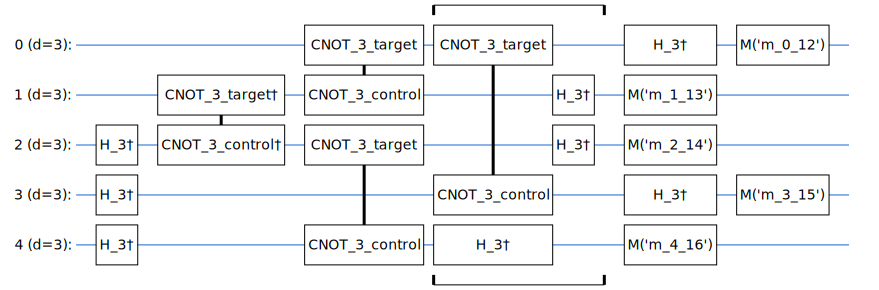

In [9]:
REL_PATH = "0/0.cirq.pkl"  # e.g., "29/8.cirq.pkl"
show_all_ops_and_view(REL_PATH)

## 4) Random Spot-Check
Quickly summarize a few random circuits (without printing every operation).

In [10]:
preview_random(n=3)

[1] 5\3.cirq.pkl
File: const_0_noiseless_lrb_cirq\5\3.cirq.pkl
Qudits: 5
Operations: 277
Depth (moments): 84
--------------------------------------------------------------------------------
[2] 24\5.cirq.pkl
File: const_0_noiseless_lrb_cirq\24\5.cirq.pkl
Qudits: 5
Operations: 525
Depth (moments): 164
--------------------------------------------------------------------------------
[3] 21\1.cirq.pkl
File: const_0_noiseless_lrb_cirq\21\1.cirq.pkl
Qudits: 5
Operations: 105
Depth (moments): 34
--------------------------------------------------------------------------------
